- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$

(1000, 1) (1000, 1)


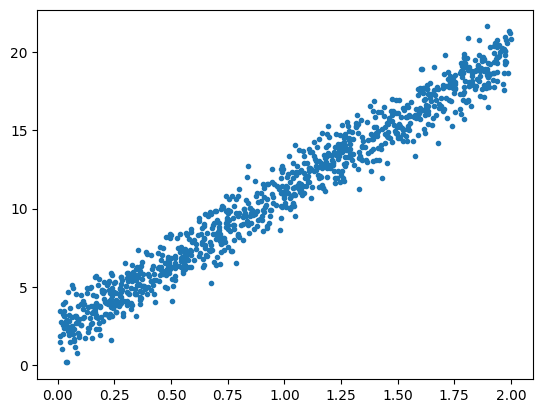

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)
samples = 1000

X = 2*np.random.rand(samples, 1)
epsilon = np.random.normal(0,1, size=(samples,1))

print(epsilon.shape, X.shape)

y = 2+9*X+epsilon

plt.plot(X,y, '.')

In [9]:
X = np.c_[np.ones(samples), X]
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

## Batch Gradient descent

In [20]:
np.random.seed(42)
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient

    return theta


theta = gradient_descent(X_train, y_train, epochs=1000)
theta


array([[2.20500716],
       [8.90206121]])

In [22]:
steps = range(1, 200, 1)
thetas = np.array(
    [gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps]
)
thetas.shape


(199, 2)

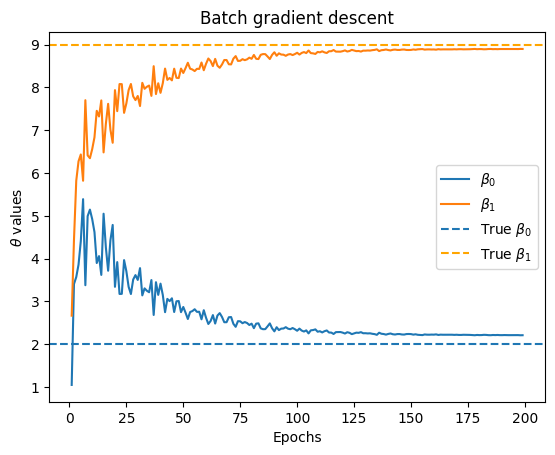

In [26]:
fig, ax = plt.figure(), plt.axes()

ax.plot(steps, thetas, label=[r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y=2, linestyle="--", label=r"True $\beta_0$")
ax.axhline(y=9, color="orange", linestyle="--", label=r"True $\beta_1$")

ax.set(xlabel="Epochs", ylabel=r"$\theta$ values", title="Batch gradient descent")
ax.legend()


## stochastic gradiant descent (SGD)

In [29]:
epochs = 10
t0, t1 = 5, 50


def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0 / (t + t1)


theta = np.random.randn(2, 1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index : random_index + 1]
        y_i = y_train[random_index : random_index + 1]

        gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradient

theta



array([[2.19730493],
       [8.87521767]])

In [33]:
y_pred = X_test@theta
MAE = np.mean(np.abs(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7707682811859047, 0.9499536615708966, 0.9746556630784518)